In [1]:
#import necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import joblib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras import layers, regularizers, callbacks
from keras.layers import Dense, BatchNormalization,Dropout

from tabulate import tabulate
from termcolor import colored
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score



In [2]:
#importing data
data=pd.read_csv("/content/obesity_data.csv")
data.head(5)

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [4]:
data.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel',
       'ObesityCategory'],
      dtype='object')

In [5]:
data.shape

(1000, 7)

In [6]:
data.describe()

,Age,Height,Weight,BMI,PhysicalActivityLevel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,170.052417,71.205769,24.888317,2.534000
std,18.114267,10.309971,15.509849,6.193912,1.116284
min,18.000000,136.115719,26.065730,8.470572,1.000000
25%,35.000000,163.514205,61.129629,20.918068,2.000000
50%,50.000000,169.801665,71.929072,24.698647,3.000000
75%,66.000000,177.353596,81.133746,28.732132,4.000000
max,79.000000,201.419670,118.907366,50.791898,4.000000


In [7]:
#checking for missing values
data.isna().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
PhysicalActivityLevel,0
ObesityCategory,0


In [8]:
data["ObesityCategory"].value_counts()


,count
ObesityCategory,
Normal weight,371
Overweight,295
Obese,191
Underweight,143


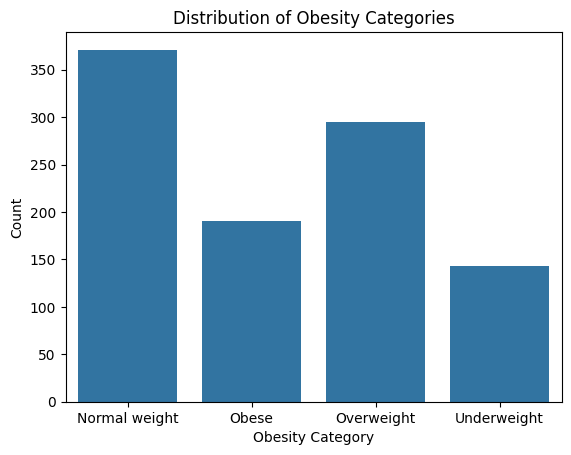

In [9]:
# Count for ObesityCategory
sns.countplot(x='ObesityCategory', data=data)
plt.title('Distribution of Obesity Categories')
plt.xlabel('Obesity Category')
plt.ylabel('Count')
plt.show()

In [10]:
#Encoding the ObesityCategory to have numerical values

obesity_encoder = LabelEncoder()

categories = ["Normal weight", "Obese", "Overweight", "Underweight"]

obesity_encoder.fit(categories)
data["ObesityCategory"] = obesity_encoder.transform(data["ObesityCategory"])

for label, code in zip(obesity_encoder.classes_, range(len(obesity_encoder.classes_))):
    print(f"{label}: {code}")

Normal weight: 0
Obese: 1
Overweight: 2
Underweight: 3


In [11]:
#Encoding the Gender to have numerical values
gender_encoder = LabelEncoder()

categories = ["Male", "Female", ]

gender_encoder.fit(categories)
data["Gender"] = gender_encoder.transform(data["Gender"])

for label, code in zip(gender_encoder.classes_, range(len(gender_encoder.classes_))):
    print(f"{label}: {code}")

Female: 0
Male: 1


In [12]:
data.head(20)

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,1,173.575262,71.982051,23.891783,4,0
1,69,1,164.127306,89.959256,33.395209,2,1
2,46,0,168.072202,72.930629,25.817737,4,2
3,32,1,168.459633,84.886912,29.912247,3,2
4,60,1,183.568568,69.038945,20.487903,3,0
5,25,0,166.405627,61.145868,22.081628,4,0
6,78,1,183.566334,92.208521,27.364341,3,2
7,38,1,142.875095,59.359746,29.078966,1,2
8,56,1,183.478558,75.157672,22.325577,4,0
9,75,1,182.974061,81.533460,24.353244,2,0


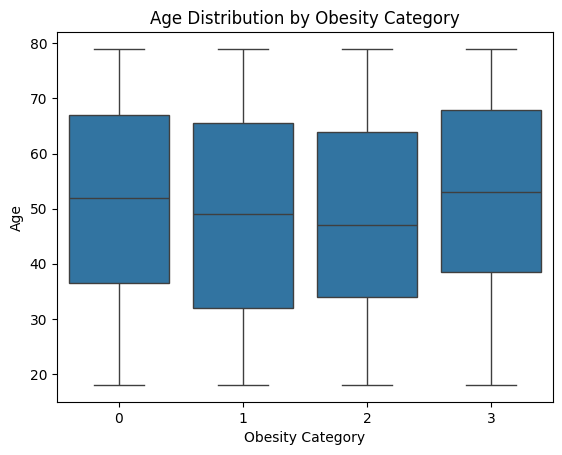

In [33]:
# Age distribution by ObesityCategory
sns.boxplot(x='ObesityCategory', y='Age', data=data)
plt.title('Age Distribution by Obesity Category')
plt.xlabel('Obesity Category')
plt.ylabel('Age')
plt.savefig("boxplot.png")
plt.show()

# Interpretation


The box plot demonstrates the relationship between age and obesity categories, indicating that older individuals are more likely to be in higher obesity groups, such as Category 3 (severely obese), with a median age of 60–70. In contrast, younger individuals are predominantly found in lower categories like Category 0 (normal weight), with a median age of 30–40. Obesity categories 2 (overweight) and 3 (severely obese) exhibit smaller age ranges, This suggests that older adults are more common in these groups, while Categories 0 and 1 show greater age variability.This indicates that age significantly influences obesity, with older populations facing increased weight related health risks, likely due to lifestyle factors.






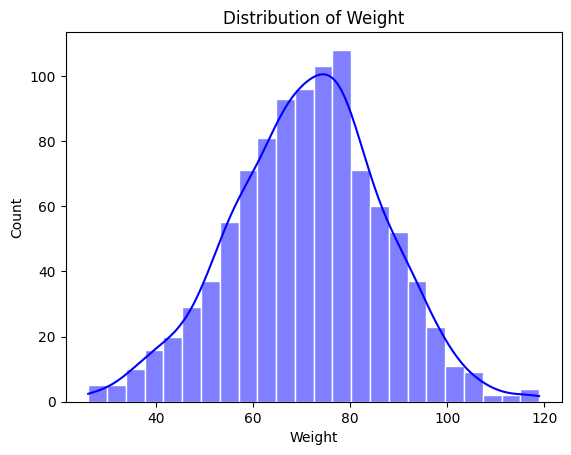

In [34]:
#Distribution of weight
sns.histplot(data=data, x='Weight', kde=True,color='blue',edgecolor='white')
plt.title("Distribution of Weight")
plt.savefig("histplot.png")
plt.show()

# Interpretation

The histogram shows the distribution of weight values in the dataset, and it follows a normal distribution. Most people weigh between 60 and 100 units, with fewer people having very low weights (around 35) or very high weights (above 120). This is normal for weight, as most people tend to fall within a middle range.

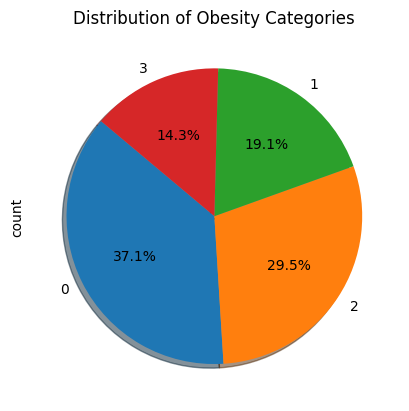

In [16]:
#Distribution of Obesity categories
data['ObesityCategory'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Distribution of Obesity Categories')
plt.savefig("piechart.png")
plt.show()

# Interpretation

This pie chart shows how the obesityCategory column is distributed. From the pie chart, there is clearly a class imbalance with 0 which normal class having the highest percentage.

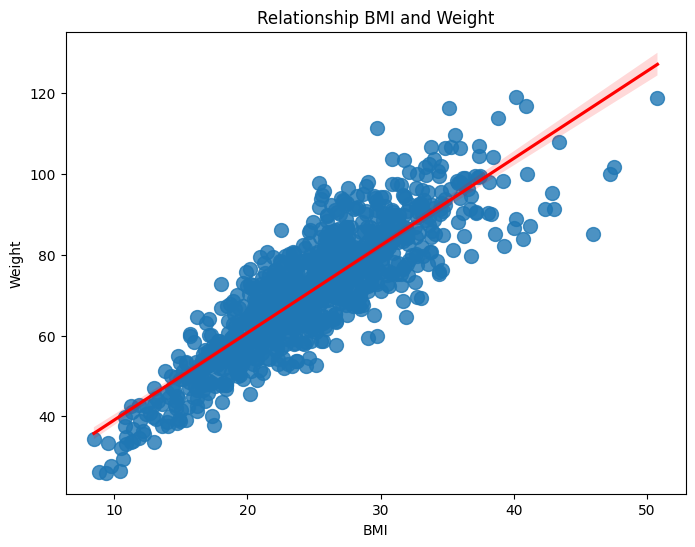

In [17]:
#plot to show the relationship between weight and BMI
plt.figure(figsize=(8, 6))

sns.regplot(data=data, x='BMI', y='Weight', scatter_kws={'s': 100}, line_kws={'color': 'red'})

plt.title('Relationship BMI and Weight')
plt.xlabel('BMI')
plt.ylabel('Weight')
plt.savefig("regplot.png")

plt.show()

# Interpretation

The data points are tightly clustered around the trend line, suggesting a strong positive correlation between BMI and weight.The BMI values range approximately from 10 to 50, while weight values range from 40 to 120.
The relationship appears linear, as the trend line fits the data well. This plot effectively visualizes the relationship between BMI and weight, highlighting a clear positive correlation.

In [18]:
#Splitting data into X and y variables
X = data.drop(columns=["ObesityCategory"])
y = data["ObesityCategory"]

In [19]:
X.head(5)

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel
0,56,1,173.575262,71.982051,23.891783,4
1,69,1,164.127306,89.959256,33.395209,2
2,46,0,168.072202,72.930629,25.817737,4
3,32,1,168.459633,84.886912,29.912247,3
4,60,1,183.568568,69.038945,20.487903,3


In [20]:
y.head(5)

,ObesityCategory
0,0
1,1
2,2
3,2
4,0


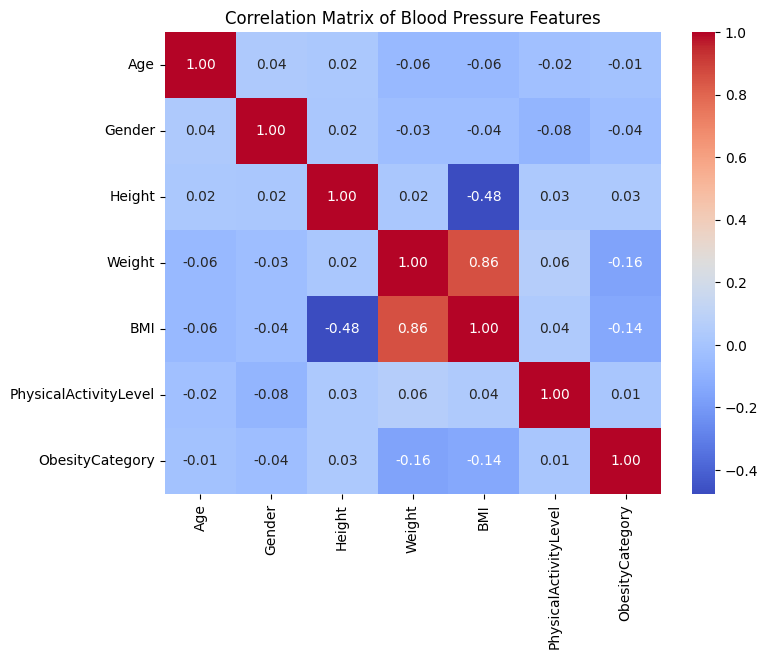

In [21]:
#correlation matrix to check relationship between features
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Blood Pressure Features")
plt.savefig("correlation.png")
plt.show()

# Interpretation

From the correlation Matrix, Weight and BMI exhibit a strong positive correlation of 0.86, indicating that BMI is largely influenced by weight. In contrast, height and BMI display a moderate negative correlation of -0.48, suggesting that taller individuals  tend to have slightly lower BMI values. Other factors such as age, gender, Physical activity level, and Obesity category show weak or negligible correlations with values near 0 . physical Activity Level has almost no correlation (0.01–0.06) with weight or BMI. As shown, Weight and BMI are the important features in this dataset

In [22]:
#Splitting data into train, test and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [42]:
#converting to dataFrames
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train, columns=["target"])
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test, columns=["target"])

# Save to CSV files
X_train_df.to_csv("X_train.csv", index=False)
y_train_df.to_csv("y_train.csv", index=False)
X_test_df.to_csv("X_test.csv", index=False)
y_test_df.to_csv("y_test.csv", index=False)

In [23]:
print("X_train shape:", X_train.shape)

X_train shape: (700, 6)


In [24]:
print("y_train shape:", y_train.shape)

y_train shape: (700,)


In [25]:
#normalizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [43]:
#Applying smote to solve class imbalance in the obesityCategory

print(" ObesityCategory distribution before SMOTE:", Counter(y_train))

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(" ObesityCategory distribution after SMOTE:", Counter(y_train_resampled))

original_samples = len(X_train)
resampled_samples = len(X_train_resampled)
new_samples = resampled_samples - original_samples
print(f"Number of new samples generated by SMOTE: {new_samples}")

 distribution before SMOTE: Counter({0: 257, 2: 204, 1: 141, 3: 98})
 distribution after SMOTE: Counter({2: 257, 0: 257, 3: 257, 1: 257})
Number of new samples generated by SMOTE: 328


In [27]:
#fuction for confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels=None, cmap="Blues"):

    cm = confusion_matrix(y_true, y_pred)
    labels = labels if labels else np.unique(y_true)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


In [35]:
#function for plotting loss curve
def plot_loss_curve(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'],"bo", label='Training Loss')
    plt.plot(history.history['val_loss'],"r", label='Validation Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.savefig("loss curve.png")
    plt.show()

In [29]:
epochs = 250
verbose= 1
validation_split= 0.2
learning_rate=0.0001
regularization_value=0.001


In [31]:
#function to train model

def obesity_model():
  model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(len(obesity_encoder.classes_), activation='softmax')
])
  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

  return model

#instance of the model and saving model
model=obesity_model()
model.save("obesity_model.h5")

In [37]:
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    verbose=verbose,
    validation_split=validation_split,
)

Epoch 1/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.3041 - loss: 1.8674 - val_accuracy: 0.2857 - val_loss: 1.3551
Epoch 2/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3227 - loss: 1.7894 - val_accuracy: 0.3571 - val_loss: 1.3208
Epoch 3/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3633 - loss: 1.7091 - val_accuracy: 0.4000 - val_loss: 1.2916
Epoch 4/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3528 - loss: 1.6930 - val_accuracy: 0.4429 - val_loss: 1.2635
Epoch 5/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4035 - loss: 1.4213 - val_accuracy: 0.4714 - val_loss: 1.2339
Epoch 6/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4250 - loss: 1.4098 - val_accuracy: 0.5143 - val_loss: 1.1997
Epoch 7/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4660 - loss: 1.2707 - val_accuracy: 0.5429 - val_loss: 1.1655
Epoch 8/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4800 - loss: 1.3082 - val_accuracy: 0.5714 - 

In [38]:
import pickle

with open('obesity.pkl', 'wb') as file:
    pickle.dump(model, file)

In [39]:
#saving the scaler and encoder
joblib.dump(scaler, "scaler.pkl")

joblib.dump(obesity_encoder, "encoder.pkl")


['encoder.pkl']

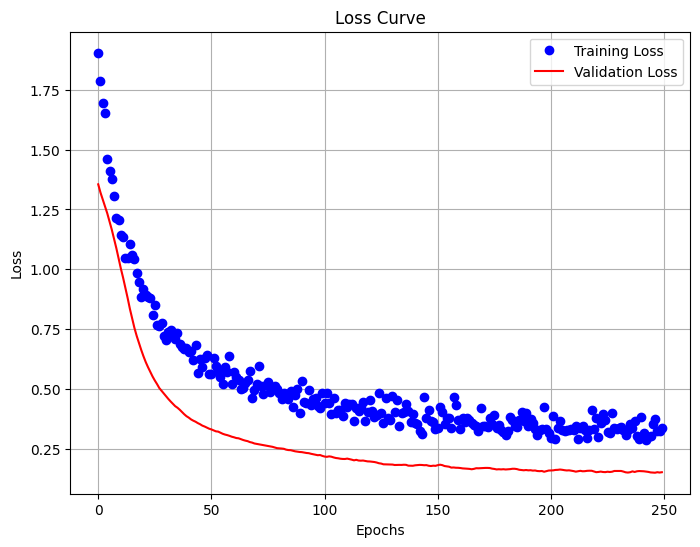

In [40]:
plot_loss_curve(history)

In [87]:
y_test

,ObesityCategory
557,0
798,1
977,2
136,3
575,2
...,...
731,1
445,0
292,3
947,3


In [89]:
# Get predictions
y_pred = model.predict(X_test)
y_test_classes = np.array(y_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=obesity_encoder.classes_))
print("Accuracy:", accuracy_score(y_test, y_pred_classes))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Classification Report:
               precision    recall  f1-score   support

Normal weight       0.98      0.87      0.92        55
        Obese       0.90      0.96      0.93        28
   Overweight       0.88      0.91      0.89        46
  Underweight       0.91      1.00      0.95        21

     accuracy                           0.92       150
    macro avg       0.92      0.94      0.93       150
 weighted avg       0.92      0.92      0.92       150

Accuracy: 0.92


In [90]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Test Accuracy:", accuracy_score(y_test, y_pred_classes))
print("Classification Report:\n", classification_report(y_test, y_pred_classes))


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Test Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92        55
           1       0.90      0.96      0.93        28
           2       0.88      0.91      0.89        46
           3       0.91      1.00      0.95        21

    accuracy                           0.92       150
   macro avg       0.92      0.94      0.93       150
weighted avg       0.92      0.92      0.92       150



In [91]:
#test loss evaluation
test_loss = model.evaluate(X_test, y_test, verbose=0)[0]

# make pedictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

print("\n----- Model Evaluation -----")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1 Score: {f1:.4f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

----- Model Evaluation -----
Test Loss: 0.2088
Test Accuracy: 0.9200
Weighted Precision: 0.9233
Weighted Recall: 0.9200
Weighted F1 Score: 0.9199


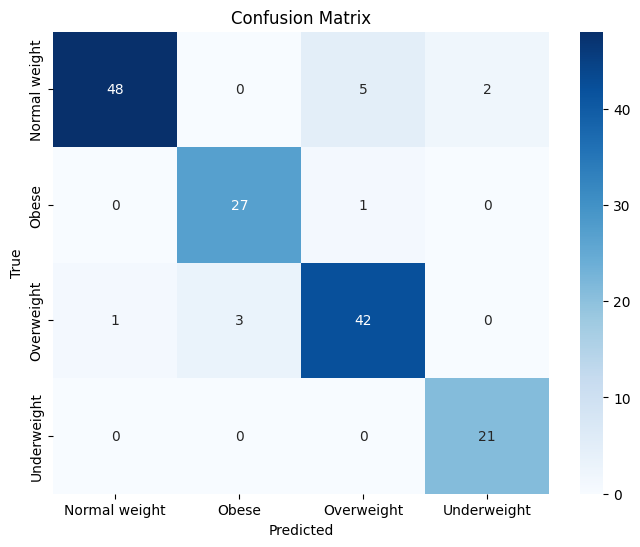

In [92]:
#computing confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=obesity_encoder.classes_,
            yticklabels=obesity_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig("confusion.png")
plt.show()

In [93]:
model = load_model("obesity_model.h5")
scaler = joblib.load("scaler.pkl")
obesity_encoder = joblib.load("encoder.pkl")

In [96]:
#function to make prediction

def predict_obesity(new_data):
    print("Raw Input Data:", new_data)

    new_data_scaled = scaler.transform(np.array(new_data, dtype=np.float32))
    print("Scaled Input Data:", new_data_scaled)

    prediction = model.predict(new_data_scaled)
    probabilities = prediction[0]

    predicted_class_index = np.argmax(probabilities)
    predicted_class = obesity_encoder.classes_[predicted_class_index]
    confidence = np.max(probabilities)

    print("\nClass Probabilities:")
    for i, prob in enumerate(probabilities):
        print(f"Class {obesity_encoder.classes_[i]}: {prob:.4f}")


    print(f"\nPredicted Class: {predicted_class}")
    print(f"Confidence: {confidence:.4f}")

    return predicted_class, confidence, probabilities

#Data inputs to make prediction
new_sample = [[75,	1,	182.974061,	81.533460,	24.353244,	2]]
new_sample2 =[[32,	1,	168.459633,	84.886912,	29.912247,	3]]

predicted_class, confidence, probs = predict_obesity(new_sample)
predicted_class, confidence, probs = predict_obesity(new_sample2)

Raw Input Data: [[75, 1, 182.974061, 81.53346, 24.353244, 2]]
Scaled Input Data: [[ 1.3902284   0.9336261   1.241032    0.64537245 -0.10126957 -0.44440353]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

Class Probabilities:
Class Normal weight: 0.2878
Class Obese: 0.1923
Class Overweight: 0.4156
Class Underweight: 0.1043

Predicted Class: Overweight
Confidence: 0.4156
Raw Input Data: [[32, 1, 168.459633, 84.886912, 29.912247, 3]]
Scaled Input Data: [[-0.9758167   0.9336261  -0.16261725  0.862071    0.7984836   0.45728478]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Class Probabilities:
Class Normal weight: 0.2712
Class Obese: 0.2580
Class Overweight: 0.2801
Class Underweight: 0.1908

Predicted Class: Overweight
Confidence: 0.2801


In [97]:
#Comparing actual and predicted values to see how  well the model is performing

le = LabelEncoder()
le.fit(y_train)

y_test_labels = le.transform(y_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_labels = le.inverse_transform(y_pred_classes)

results = pd.DataFrame({
    'Actual': y_test_labels,
    'Predicted': y_pred_labels
})

results['Status'] = results['Actual'] == results['Predicted']
results['Status'] = results['Status'].map({True: '✓', False: '✗'})


def decorate_results(row):

    if row['Status'] == '✓':
        status_colored = colored(row['Status'], 'green')
    else:
        status_colored = colored(row['Status'], 'red')

    return [row['Actual'], row['Predicted'], status_colored]


decorated_results = results.head(50).apply(decorate_results, axis=1)

print(tabulate(decorated_results, headers=["Actual", "Predicted", "Status"], tablefmt="fancy_grid"))


╒════╤══════════╤═════════════╤══════════╕
│    │   Actual │   Predicted │ Status   │
╞════╪══════════╪═════════════╪══════════╡
│  0 │        0 │           0 │ ✓        │
├────┼──────────┼─────────────┼──────────┤
│  1 │        1 │           1 │ ✓        │
├────┼──────────┼─────────────┼──────────┤
│  2 │        2 │           2 │ ✓        │
├────┼──────────┼─────────────┼──────────┤
│  3 │        3 │           3 │ ✓        │
├────┼──────────┼─────────────┼──────────┤
│  4 │        2 │           2 │ ✓        │
├────┼──────────┼─────────────┼──────────┤
│  5 │        2 │           1 │ ✗        │
├────┼──────────┼─────────────┼──────────┤
│  6 │        0 │           0 │ ✓        │
├────┼──────────┼─────────────┼──────────┤
│  7 │        2 │           2 │ ✓        │
├────┼──────────┼─────────────┼──────────┤
│  8 │        0 │           0 │ ✓        │
├────┼──────────┼─────────────┼──────────┤
│  9 │        3 │           3 │ ✓        │
├────┼──────────┼─────────────┼──────────┤
│ 10 │     